# Comprehensive Model Development Guide

Welcome to this complete educational guide on **Machine Learning Model Development**! This notebook covers everything from basic regression to advanced model evaluation and refinement techniques.

## 🎯 Learning Objectives

By the end of this notebook, you will master:

1. **Regression Techniques** - Simple, Multiple, and Polynomial Regression
2. **Feature Engineering** - Transformation, scaling, and polynomial features
3. **Model Evaluation** - MSE, R², residual analysis, and diagnostic plots
4. **Model Validation** - Train-test splits and cross-validation
5. **Overfitting & Underfitting** - Bias-variance tradeoff and model selection
6. **Regularization** - Ridge regression and hyperparameter tuning
7. **Pipeline Development** - End-to-end ML workflows
8. **Real-world Applications** - Practical examples with automotive data

## 📊 What We'll Build

We'll develop predictive models for **car price prediction** using various regression techniques, demonstrating the complete machine learning workflow from data preprocessing to model deployment.

---

Let's begin our comprehensive journey into model development!

In [14]:
# Essential Library Imports for Model Development
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Imports
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Configure plotting
%matplotlib inline
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("🚀 Ready for comprehensive model development!")

✅ All libraries imported successfully!
🚀 Ready for comprehensive model development!


## 1. Data Loading and Preparation

The foundation of any successful machine learning project is quality data. Let's load our automotive dataset and prepare it for model development.

In [15]:
# Load the automotive dataset
# Using the cleaned dataset from our data analysis module
df = pd.read_csv('../03_Data_analysis/clean_df.csv', index_col=0)

print("🎉 Dataset loaded successfully!")
print(f"📊 Dataset dimensions: {df.shape[0]} rows × {df.shape[1]} columns")

# Display basic information
print(f"\n📋 Dataset Overview:")
print(f"• Target variable: price")
print(f"• Features available: {df.shape[1] - 1}")
print(f"• Data types: {df.dtypes.value_counts().to_dict()}")

# Show first few rows
print(f"\n🔍 First 5 rows:")
df.head()

🎉 Dataset loaded successfully!
📊 Dataset dimensions: 201 rows × 30 columns

📋 Dataset Overview:
• Target variable: price
• Features available: 29
• Data types: {dtype('float64'): 11, dtype('O'): 9, dtype('int64'): 6, dtype('bool'): 4}

🔍 First 5 rows:


,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False


In [28]:
# Prepare features for modeling
print("🔧 PREPARING FEATURES FOR MODELING")
print("=" * 50)

# Select numerical features for modeling
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'price' in numerical_features:
    numerical_features.remove('price')

print(f"📊 Available numerical features: {len(numerical_features)}")
print(f"Features: {numerical_features}")

# Select key features based on domain knowledge and previous analysis
key_features = ['engine-size', 'curb-weight', 'horsepower', 'city-mpg', 'wheel-base']
# Use available features from the dataset
selected_features = [col for col in key_features if col in df.columns]

if not selected_features:
    # If key features not available, use first few numerical features
    selected_features = numerical_features[:5]

print(f"\n🎯 Selected features for modeling: {selected_features}")

# Prepare feature matrix (X) and target vector (y)
X = df[selected_features].copy()
y = df['price'].copy()

# Check for missing values
print(f"\n🔍 Data Quality Check:")
print(f"• Missing values in features: {X.isnull().sum().sum()}")
print(f"• Missing values in target: {y.isnull().sum()}")

# Handle missing values if any
if X.isnull().sum().sum() > 0:
    print("⚠️ Handling missing values with median imputation")
    X = X.fillna(X.median())

if y.isnull().sum() > 0:
    print("⚠️ Removing rows with missing target values")
    mask = ~y.isnull()
    X = X[mask]
    y = y[mask]

print(f"\n✅ Final dataset ready:")
print(f"• Features shape: {X.shape}")
print(f"• Target shape: {y.shape}")
print(f"• Feature statistics:")
print(X.describe().round(2))

🔧 PREPARING FEATURES FOR MODELING
📊 Available numerical features: 16
Features: ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'city-L/100km']

🎯 Selected features for modeling: ['engine-size', 'curb-weight', 'horsepower', 'city-mpg', 'wheel-base']

🔍 Data Quality Check:
• Missing values in features: 0
• Missing values in target: 0

✅ Final dataset ready:
• Features shape: (201, 5)
• Target shape: (201,)
• Feature statistics:
       engine-size  curb-weight  horsepower  city-mpg  wheel-base
count       201.00       201.00      201.00    201.00      201.00
mean        126.88      2555.67      103.40     25.18       98.80
std          41.55       517.30       37.37      6.42        6.07
min          61.00      1488.00       48.00     13.00       86.60
25%          98.00      2169.00       70.00     19.00       94.50
50%         120.00

## 2. Simple Linear Regression

**Simple Linear Regression** models the relationship between a single independent variable and a dependent variable using a linear equation:

**y = β₀ + β₁x + ε**

Where:
- **y**: Dependent variable (price)
- **x**: Independent variable (feature)
- **β₀**: Intercept (y-axis crossing point)
- **β₁**: Slope (rate of change)
- **ε**: Error term

Let's start with modeling price using engine size as our single predictor.

🔍 SIMPLE LINEAR REGRESSION
🎯 Predicting price using: engine-size

📊 Model Equation:
price = -7963.34 + 166.86 × engine-size

📈 Model Performance:
• R² Score: 0.7610 (76.1% variance explained)
• RMSE: $3,875.71
• MSE: 15,021,126.03


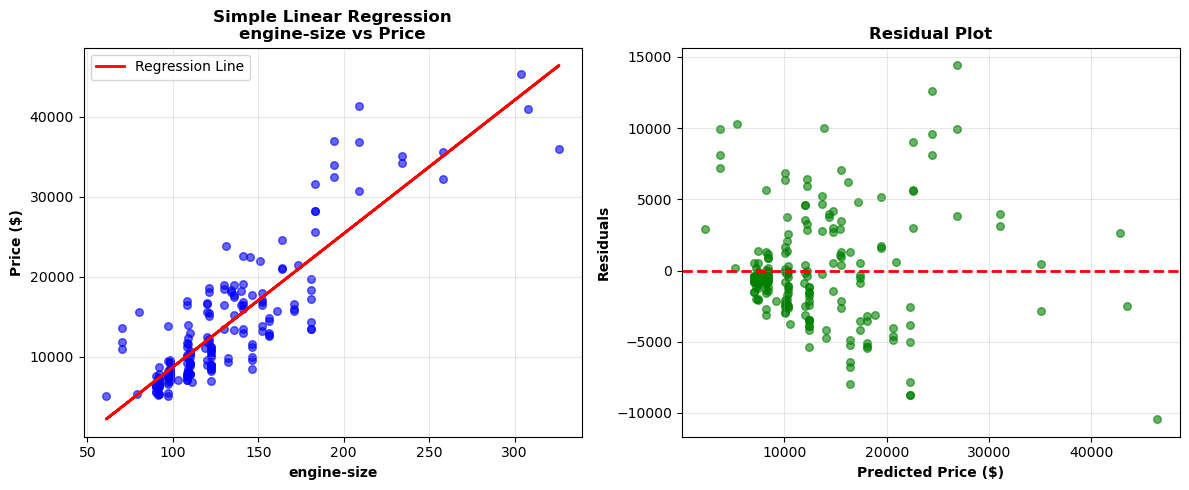


💡 Interpretation:
• For every unit increase in engine-size, price increases by $166.86
• Model explains 76.1% of price variation
• Strong relationship observed


In [17]:
# Simple Linear Regression - Using Engine Size to Predict Price
print("🔍 SIMPLE LINEAR REGRESSION")
print("=" * 50)

# Select the best single feature for demonstration
if 'engine-size' in X.columns:
    feature_name = 'engine-size'
elif len(selected_features) > 0:
    feature_name = selected_features[0]
else:
    feature_name = X.columns[0]

X_simple = X[[feature_name]].copy()
print(f"🎯 Predicting price using: {feature_name}")

# Create and fit the model
model_simple = LinearRegression()
model_simple.fit(X_simple, y)

# Make predictions
y_pred_simple = model_simple.predict(X_simple)

# Extract model parameters
intercept = model_simple.intercept_
slope = model_simple.coef_[0]

print(f"\n📊 Model Equation:")
print(f"price = {intercept:.2f} + {slope:.2f} × {feature_name}")

# Calculate performance metrics
mse_simple = mean_squared_error(y, y_pred_simple)
r2_simple = r2_score(y, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)

print(f"\n📈 Model Performance:")
print(f"• R² Score: {r2_simple:.4f} ({r2_simple*100:.1f}% variance explained)")
print(f"• RMSE: ${rmse_simple:,.2f}")
print(f"• MSE: {mse_simple:,.2f}")

# Visualize the regression
plt.figure(figsize=(12, 5))

# Scatter plot with regression line
plt.subplot(1, 2, 1)
plt.scatter(X_simple, y, alpha=0.6, color='blue', s=30)
plt.plot(X_simple, y_pred_simple, color='red', linewidth=2, label=f'Regression Line')
plt.xlabel(feature_name, fontweight='bold')
plt.ylabel('Price ($)', fontweight='bold')
plt.title(f'Simple Linear Regression\n{feature_name} vs Price', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Residual plot
plt.subplot(1, 2, 2)
residuals = y - y_pred_simple
plt.scatter(y_pred_simple, residuals, alpha=0.6, color='green', s=30)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Price ($)', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.title('Residual Plot', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 Interpretation:")
print(f"• For every unit increase in {feature_name}, price increases by ${slope:.2f}")
print(f"• Model explains {r2_simple*100:.1f}% of price variation")
print(f"• {'Strong' if r2_simple > 0.7 else 'Moderate' if r2_simple > 0.4 else 'Weak'} relationship observed")

## 3. Multiple Linear Regression

**Multiple Linear Regression** extends simple regression to use multiple independent variables:

**y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε**

This allows us to capture more complex relationships and typically provides better predictions by considering multiple factors simultaneously.

### Advantages of Multiple Linear Regression:
- **Better Predictions**: Uses more information
- **Feature Importance**: Shows relative impact of each variable
- **Real-world Modeling**: Most real phenomena depend on multiple factors

🔍 MULTIPLE LINEAR REGRESSION
🎯 Predicting price using 4 features:
   1. engine-size
   2. curb-weight
   3. horsepower
   4. wheel-base

📊 Model Equation:
price = -22028.77 + (83.75 × engine-size) + (2.83 × curb-weight) + (59.00 × horsepower) + (114.13 × wheel-base)

📈 Model Performance:
• R² Score: 0.8112 (81.1% variance explained)
• RMSE: $3,444.37
• MSE: 11,863,693.68

🎯 Feature Importance (by absolute coefficient):
• wheel-base     :   114.13 (Positive impact)
• engine-size    :    83.75 (Positive impact)
• horsepower     :    59.00 (Positive impact)
• curb-weight    :     2.83 (Positive impact)


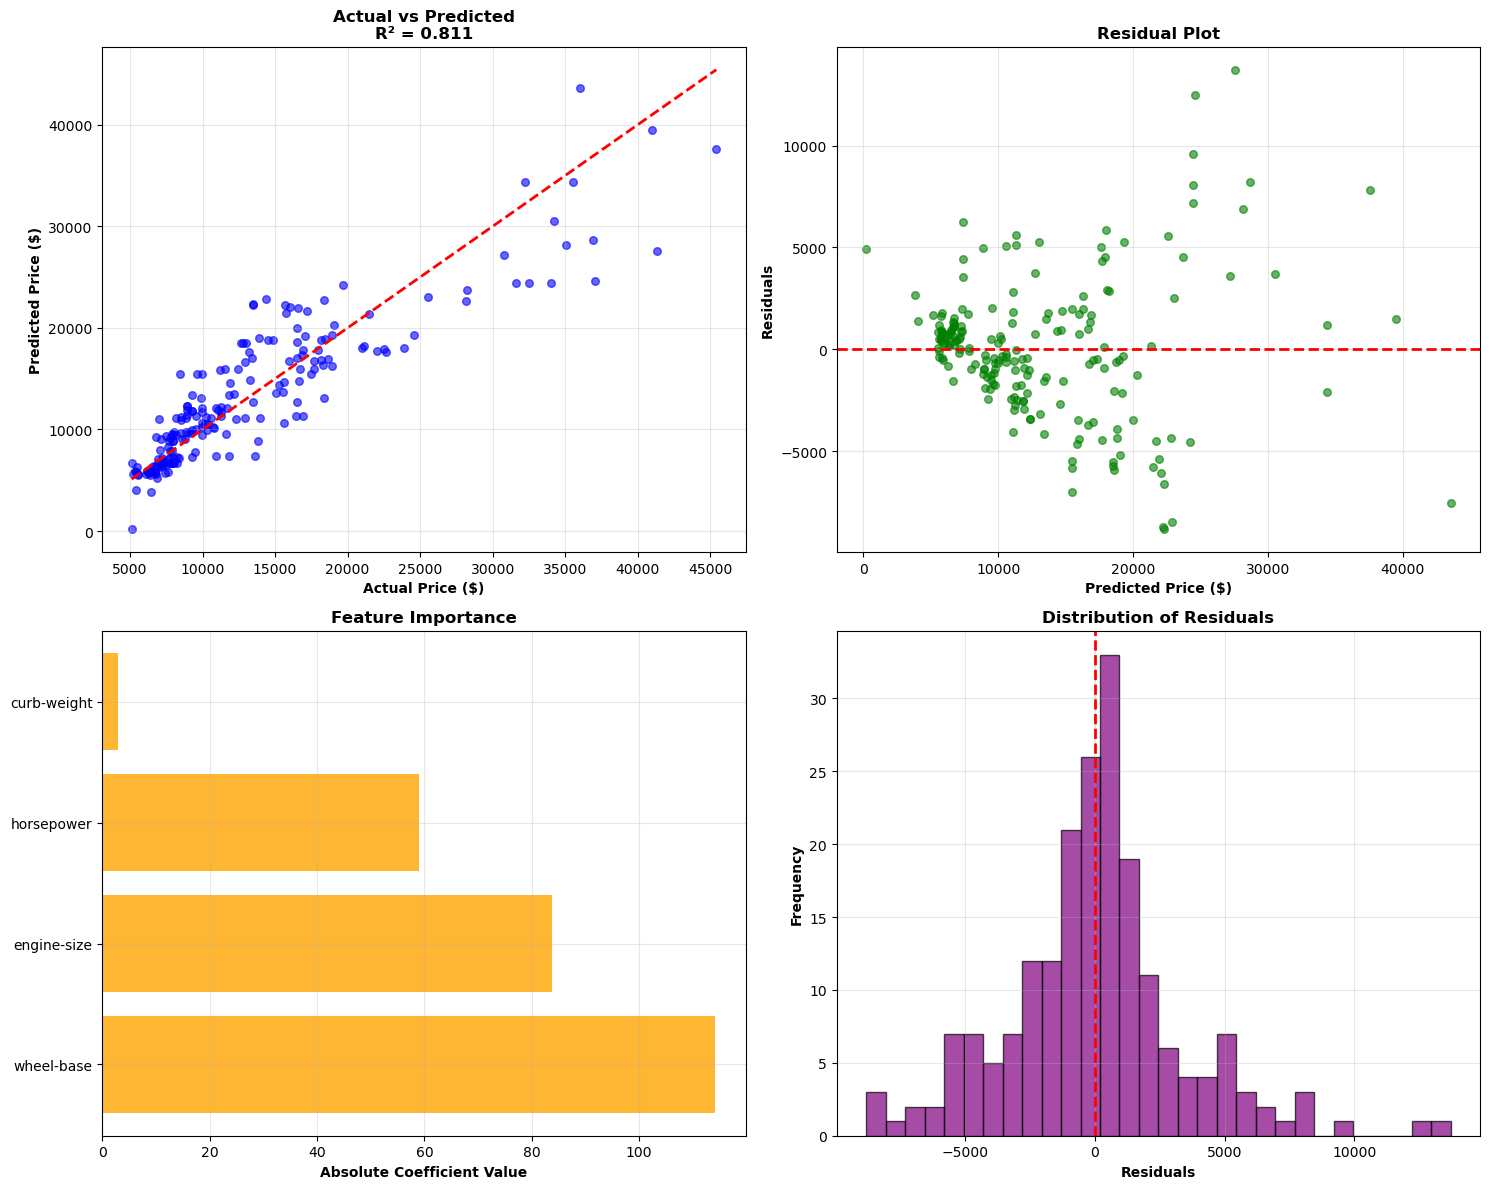


📊 MODEL COMPARISON:
Metric          Simple LR    Multiple LR  Improvement 
-------------------------------------------------------
R² Score        0.7610       0.8112           +6.6%
RMSE            3,876        3,444           -11.1%

✅ Multiple Linear Regression performs better
📈 Additional features explain 5.0% more variance


In [18]:
# Multiple Linear Regression - Using All Selected Features
print("🔍 MULTIPLE LINEAR REGRESSION")
print("=" * 50)

# Use all selected features
X_multiple = X[selected_features].copy()
print(f"🎯 Predicting price using {len(selected_features)} features:")
for i, feature in enumerate(selected_features, 1):
    print(f"   {i}. {feature}")

# Create and fit the model
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

# Make predictions
y_pred_multiple = model_multiple.predict(X_multiple)

# Extract model parameters
intercept_mult = model_multiple.intercept_
coefficients = model_multiple.coef_

print(f"\n📊 Model Equation:")
equation = f"price = {intercept_mult:.2f}"
for feature, coef in zip(selected_features, coefficients):
    equation += f" + ({coef:.2f} × {feature})"
print(equation)

# Calculate performance metrics
mse_multiple = mean_squared_error(y, y_pred_multiple)
r2_multiple = r2_score(y, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)

print(f"\n📈 Model Performance:")
print(f"• R² Score: {r2_multiple:.4f} ({r2_multiple*100:.1f}% variance explained)")
print(f"• RMSE: ${rmse_multiple:,.2f}")
print(f"• MSE: {mse_multiple:,.2f}")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n🎯 Feature Importance (by absolute coefficient):")
for idx, row in feature_importance.iterrows():
    impact = "Positive" if row['Coefficient'] > 0 else "Negative"
    print(f"• {row['Feature']:15}: {row['Coefficient']:8.2f} ({impact} impact)")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted
axes[0, 0].scatter(y, y_pred_multiple, alpha=0.6, color='blue', s=30)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
axes[0, 0].set_xlabel('Actual Price ($)', fontweight='bold')
axes[0, 0].set_ylabel('Predicted Price ($)', fontweight='bold')
axes[0, 0].set_title(f'Actual vs Predicted\nR² = {r2_multiple:.3f}', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals vs Predicted
residuals_mult = y - y_pred_multiple
axes[0, 1].scatter(y_pred_multiple, residuals_mult, alpha=0.6, color='green', s=30)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Price ($)', fontweight='bold')
axes[0, 1].set_ylabel('Residuals', fontweight='bold')
axes[0, 1].set_title('Residual Plot', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Feature Importance
axes[1, 0].barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'], 
                color='orange', alpha=0.8)
axes[1, 0].set_xlabel('Absolute Coefficient Value', fontweight='bold')
axes[1, 0].set_title('Feature Importance', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Distribution of residuals
axes[1, 1].hist(residuals_mult, bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title('Distribution of Residuals', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare with simple linear regression
print(f"\n📊 MODEL COMPARISON:")
print(f"{'Metric':<15} {'Simple LR':<12} {'Multiple LR':<12} {'Improvement':<12}")
print("-" * 55)
print(f"{'R² Score':<15} {r2_simple:<12.4f} {r2_multiple:<12.4f} {((r2_multiple-r2_simple)/r2_simple*100):+8.1f}%")
print(f"{'RMSE':<15} {rmse_simple:<12,.0f} {rmse_multiple:<12,.0f} {((rmse_multiple-rmse_simple)/rmse_simple*100):+8.1f}%")

improvement = r2_multiple > r2_simple
print(f"\n✅ Multiple Linear Regression {'performs better' if improvement else 'needs improvement'}")
print(f"📈 Additional features explain {(r2_multiple-r2_simple)*100:.1f}% more variance")

## 4. Polynomial Regression

**Polynomial Regression** captures non-linear relationships by using polynomial features. Instead of just x, we use x, x², x³, etc.

**For degree 2: y = β₀ + β₁x + β₂x² + ε**

### When to Use Polynomial Regression:
- **Non-linear relationships** between variables
- **Curved patterns** in scatter plots
- **Improve model fit** when linear relationship is insufficient

### Key Considerations:
- **Higher degrees** can lead to overfitting
- **Feature scaling** becomes more important
- **Interpretation** becomes more complex

🔍 POLYNOMIAL REGRESSION
🎯 Creating polynomial features for: engine-size

📊 Testing Polynomial Degree 1:
   • Features created: 1
   • R² Score: 0.7610
   • RMSE: $3,875.71

📊 Testing Polynomial Degree 2:
   • Features created: 2
   • R² Score: 0.7610
   • RMSE: $3,875.12

📊 Testing Polynomial Degree 3:
   • Features created: 3
   • R² Score: 0.7902
   • RMSE: $3,631.42

📊 Testing Polynomial Degree 4:
   • Features created: 4
   • R² Score: 0.7902
   • RMSE: $3,631.40


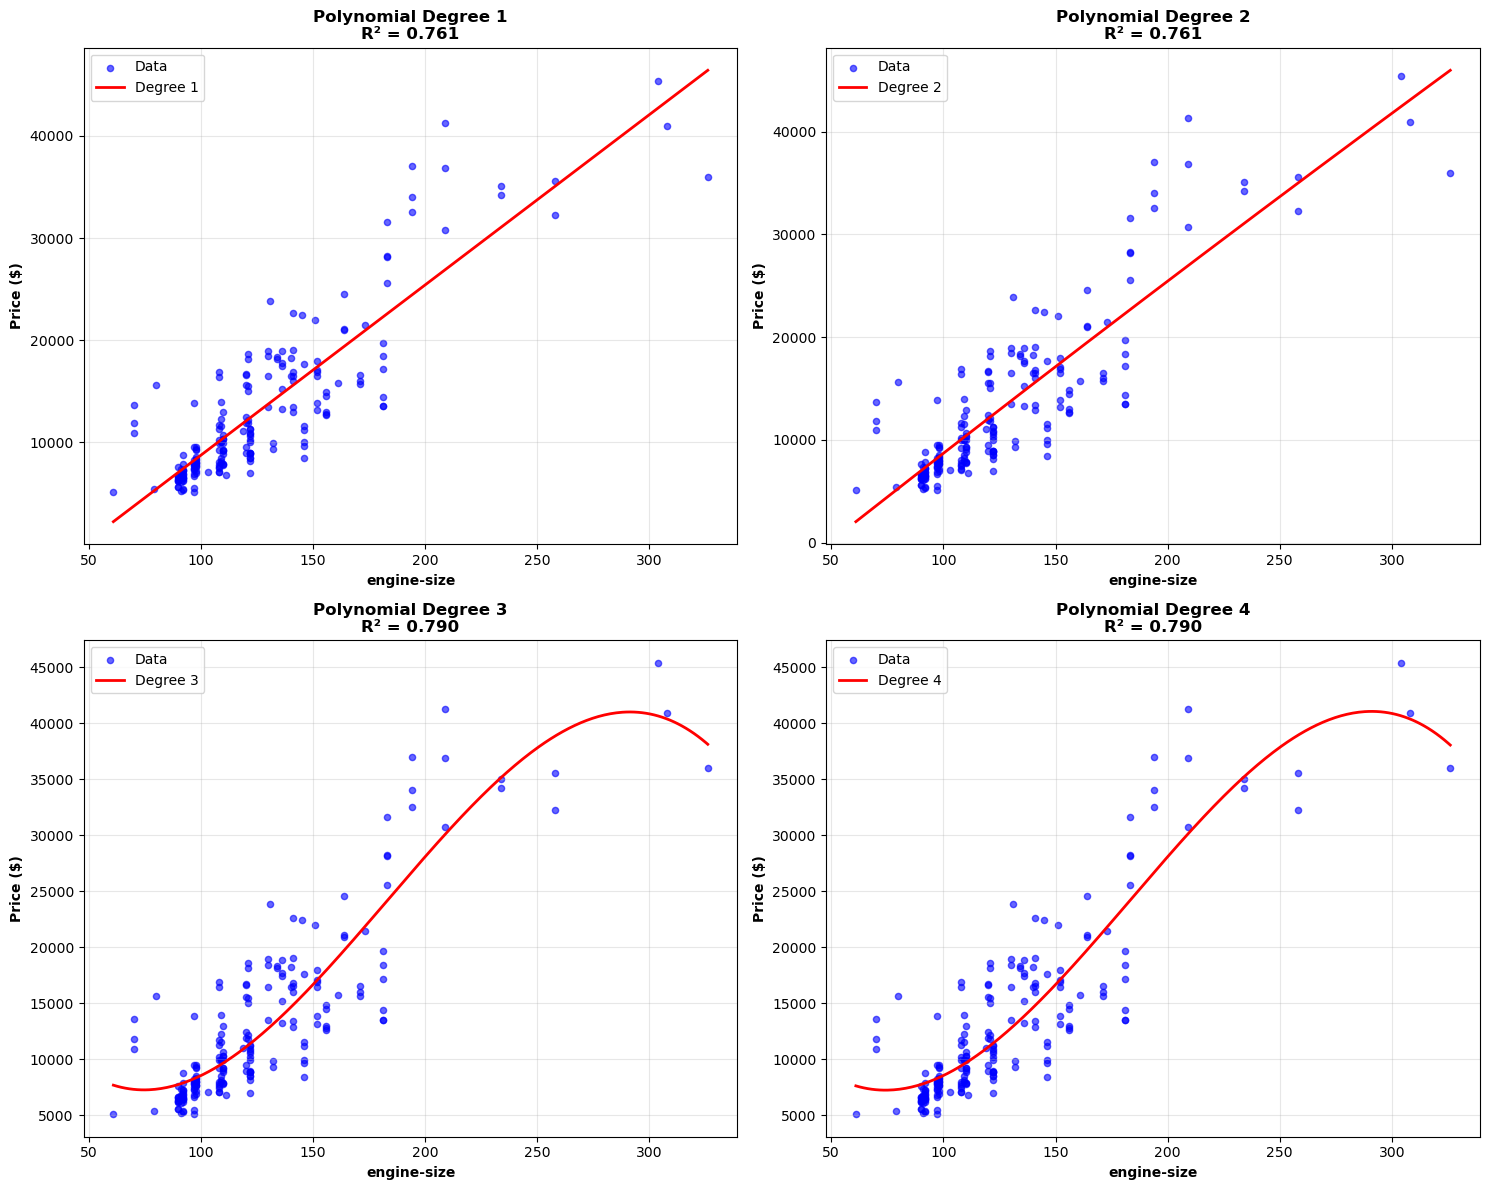


📊 POLYNOMIAL REGRESSION COMPARISON:
   Degree      R2       RMSE           MSE  Features
0       1  0.7610  3875.7097  1.502113e+07         1
1       2  0.7610  3875.1190  1.501655e+07         2
2       3  0.7902  3631.4179  1.318720e+07         3
3       4  0.7902  3631.3984  1.318705e+07         4


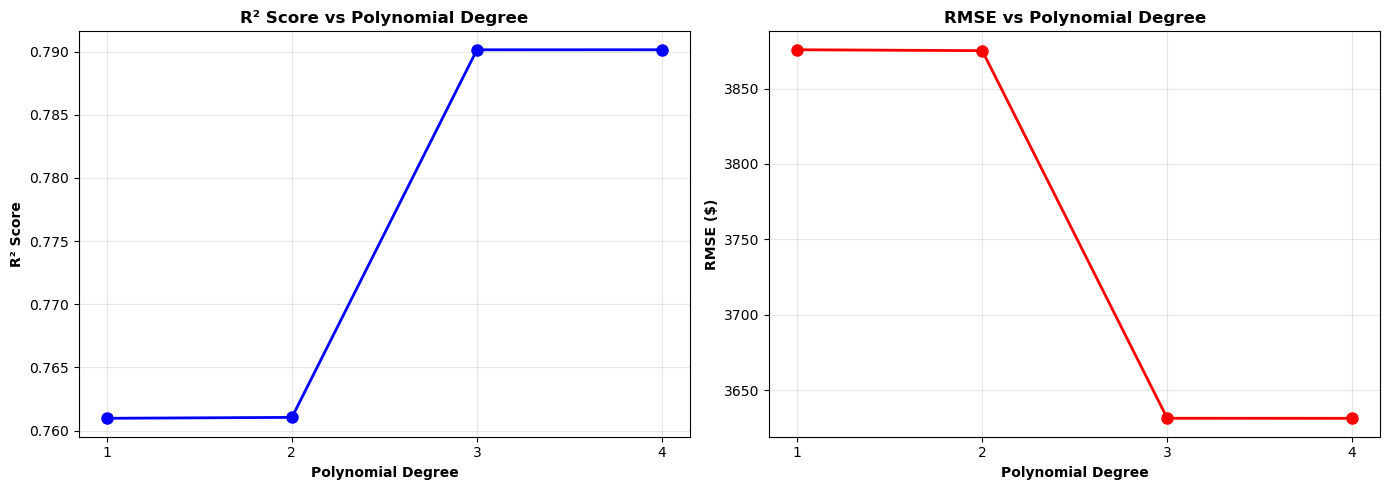


🏆 BEST POLYNOMIAL DEGREE: 4
• R² Score: 0.7902
• RMSE: $3,631.40
• Features created: 4

⚠️  WARNING: High polynomial degree (4) may indicate overfitting!
   Consider using regularization or cross-validation.

💡 KEY INSIGHTS:
• Polynomial features can capture non-linear relationships
• Higher degrees increase model complexity
• Balance between fit improvement and overfitting risk


In [19]:
# Polynomial Regression - Capturing Non-linear Relationships
print("🔍 POLYNOMIAL REGRESSION")
print("=" * 50)

# Test different polynomial degrees
degrees = [1, 2, 3, 4]
poly_results = []

# Use single feature for polynomial demonstration
X_poly_single = X_simple.copy()
print(f"🎯 Creating polynomial features for: {feature_name}")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, degree in enumerate(degrees):
    print(f"\n📊 Testing Polynomial Degree {degree}:")
    
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X_poly_single)
    
    # Create and fit model
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)
    
    # Make predictions
    y_pred_poly = model_poly.predict(X_poly)
    
    # Calculate metrics
    mse_poly = mean_squared_error(y, y_pred_poly)
    r2_poly = r2_score(y, y_pred_poly)
    rmse_poly = np.sqrt(mse_poly)
    
    # Store results
    poly_results.append({
        'Degree': degree,
        'R2': r2_poly,
        'RMSE': rmse_poly,
        'MSE': mse_poly,
        'Features': X_poly.shape[1]
    })
    
    print(f"   • Features created: {X_poly.shape[1]}")
    print(f"   • R² Score: {r2_poly:.4f}")
    print(f"   • RMSE: ${rmse_poly:,.2f}")
    
    # Create smooth line for visualization
    X_range = np.linspace(X_poly_single.min(), X_poly_single.max(), 300).reshape(-1, 1)
    X_range_poly = poly_features.transform(X_range)
    y_range_pred = model_poly.predict(X_range_poly)
    
    # Plot
    axes[i].scatter(X_poly_single, y, alpha=0.6, color='blue', s=20, label='Data')
    axes[i].plot(X_range, y_range_pred, color='red', linewidth=2, label=f'Degree {degree}')
    axes[i].set_xlabel(feature_name, fontweight='bold')
    axes[i].set_ylabel('Price ($)', fontweight='bold')
    axes[i].set_title(f'Polynomial Degree {degree}\nR² = {r2_poly:.3f}', fontweight='bold')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Results comparison
poly_df = pd.DataFrame(poly_results)
print(f"\n📊 POLYNOMIAL REGRESSION COMPARISON:")
print(poly_df.round(4))

# Plot comparison metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² comparison
axes[0].plot(poly_df['Degree'], poly_df['R2'], 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Polynomial Degree', fontweight='bold')
axes[0].set_ylabel('R² Score', fontweight='bold')
axes[0].set_title('R² Score vs Polynomial Degree', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(degrees)

# RMSE comparison
axes[1].plot(poly_df['Degree'], poly_df['RMSE'], 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Polynomial Degree', fontweight='bold')
axes[1].set_ylabel('RMSE ($)', fontweight='bold')
axes[1].set_title('RMSE vs Polynomial Degree', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(degrees)

plt.tight_layout()
plt.show()

# Find best degree
best_poly = poly_df.loc[poly_df['R2'].idxmax()]
print(f"\n🏆 BEST POLYNOMIAL DEGREE: {int(best_poly['Degree'])}")
print(f"• R² Score: {best_poly['R2']:.4f}")
print(f"• RMSE: ${best_poly['RMSE']:,.2f}")
print(f"• Features created: {int(best_poly['Features'])}")

# Warning about overfitting
if best_poly['Degree'] > 3:
    print(f"\n⚠️  WARNING: High polynomial degree ({int(best_poly['Degree'])}) may indicate overfitting!")
    print("   Consider using regularization or cross-validation.")

print(f"\n💡 KEY INSIGHTS:")
print(f"• Polynomial features can capture non-linear relationships")
print(f"• Higher degrees increase model complexity")
print(f"• Balance between fit improvement and overfitting risk")

## 5. Feature Transformation and Scaling

**Feature scaling** is crucial for machine learning algorithms, especially when features have different scales or when using polynomial features.

### Why Feature Scaling Matters:
- **Different scales**: Features like price ($) vs. mileage (mpg) have vastly different ranges
- **Algorithm performance**: Many ML algorithms are sensitive to feature scales
- **Gradient descent**: Converges faster with scaled features
- **Regularization**: Works better when features are on similar scales

### Common Scaling Methods:
- **StandardScaler**: Mean = 0, Standard Deviation = 1
- **MinMaxScaler**: Scale to [0, 1] range
- **RobustScaler**: Uses median and quartiles (robust to outliers)

In [20]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False


In [21]:
# Check available columns in the dataset
print("Available columns in the dataset:")
print(df.columns.tolist())
print(f"\nDataset shape: {df.shape}")

# Check for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"\nNumerical columns: {numerical_cols}")

Available columns in the dataset:
['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned', 'fuel-type-diesel', 'fuel-type-gas', 'aspiration-std', 'aspiration-turbo']

Dataset shape: (201, 30)

Numerical columns: ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price', 'city-L/100km']


Original feature ranges:
         city-mpg  engine-size  horsepower  curb-weight
count  160.000000   160.000000  160.000000   160.000000
mean    25.293750   124.687500  101.918750  2539.475000
std      6.326143    39.756679   35.752991   491.888543
min     13.000000    61.000000   48.000000  1488.000000
25%     19.750000    98.000000   70.000000  2190.750000
50%     24.500000   110.500000   95.000000  2417.000000
75%     30.000000   141.000000  115.250000  2928.250000
max     49.000000   326.000000  262.000000  4066.000000


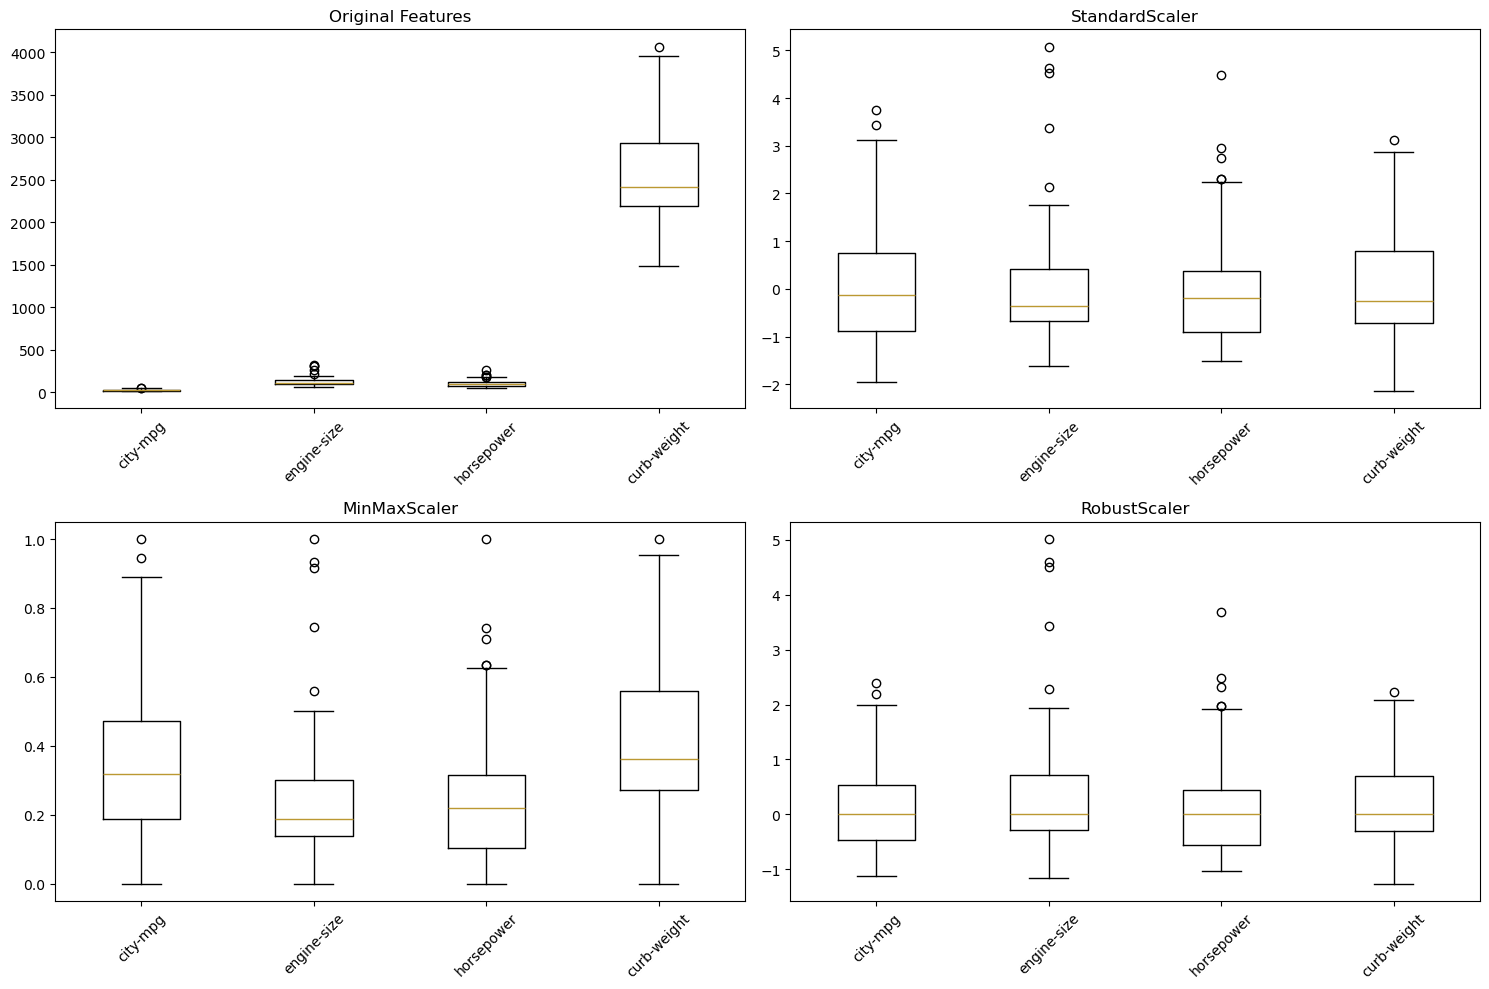


Model Performance Comparison with Different Scalers:
------------------------------------------------------------
StandardScaler:
  Train R²: 0.8095, Test R²: 0.7625
  Train RMSE: $2,948, Test RMSE: $5,390

MinMaxScaler:
  Train R²: 0.8095, Test R²: 0.7625
  Train RMSE: $2,948, Test RMSE: $5,390

RobustScaler:
  Train R²: 0.8095, Test R²: 0.7625
  Train RMSE: $2,948, Test RMSE: $5,390

No Scaling (Baseline):
  Train R²: 0.8095, Test R²: 0.7625
  Train RMSE: $2,948, Test RMSE: $5,390


In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Prepare features and target (using actual column names from the dataset)
features = ['city-mpg', 'engine-size', 'horsepower', 'curb-weight']
X = df[features].copy()
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original feature ranges:")
print(X_train.describe())

# Apply different scaling methods
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Original data distribution
axes[0].boxplot([X_train[col] for col in features], labels=features)
axes[0].set_title('Original Features')
axes[0].tick_params(axis='x', rotation=45)

# Apply and visualize each scaler
for idx, (name, scaler) in enumerate(scalers.items(), 1):
    X_scaled = scaler.fit_transform(X_train)
    axes[idx].boxplot([X_scaled[:, i] for i in range(len(features))], labels=features)
    axes[idx].set_title(f'{name}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Compare model performance with different scalers
print("\nModel Performance Comparison with Different Scalers:")
print("-" * 60)

for name, scaler in scalers.items():
    # Scale the training data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"{name}:")
    print(f"  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"  Train RMSE: ${train_rmse:,.0f}, Test RMSE: ${test_rmse:,.0f}")
    print()

# Without scaling (baseline)
model_baseline = LinearRegression()
model_baseline.fit(X_train, y_train)
y_train_pred = model_baseline.predict(X_train)
y_test_pred = model_baseline.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("No Scaling (Baseline):")
print(f"  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
print(f"  Train RMSE: ${train_rmse:,.0f}, Test RMSE: ${test_rmse:,.0f}")

## 6. Model Evaluation and Validation

**Model evaluation** is critical to understand how well your model performs and whether it generalizes to new data.

### Key Evaluation Metrics for Regression:

1. **R-squared (R²)**: Proportion of variance explained by the model
   - Range: 0 to 1 (higher is better)
   - R² = 1 - (SS_res / SS_tot)

2. **Mean Squared Error (MSE)**: Average of squared differences
   - Lower is better
   - Sensitive to outliers

3. **Root Mean Squared Error (RMSE)**: Square root of MSE
   - Same units as target variable
   - Easy to interpret

4. **Mean Absolute Error (MAE)**: Average of absolute differences
   - Less sensitive to outliers than MSE
   - Robust metric

### Cross-Validation:
- **Purpose**: Get more reliable performance estimates
- **K-Fold CV**: Split data into k folds, train on k-1, test on 1
- **Benefits**: Reduces overfitting to specific train/test split

Training Metrics:
  R²: 0.8095
  MSE: 8,693,484
  RMSE: $2,948
  MAE: $2,104

Test Metrics:
  R²: 0.7625
  MSE: 29,053,322
  RMSE: $5,390
  MAE: $3,788

Cross-Validation Results (5-fold):
----------------------------------------
R² - Train: 0.8087 ± 0.0377
R² - Test:  0.5508 ± 0.2774
RMSE - Train: $3,399 ± $53
RMSE - Test:  $4,046 ± $311


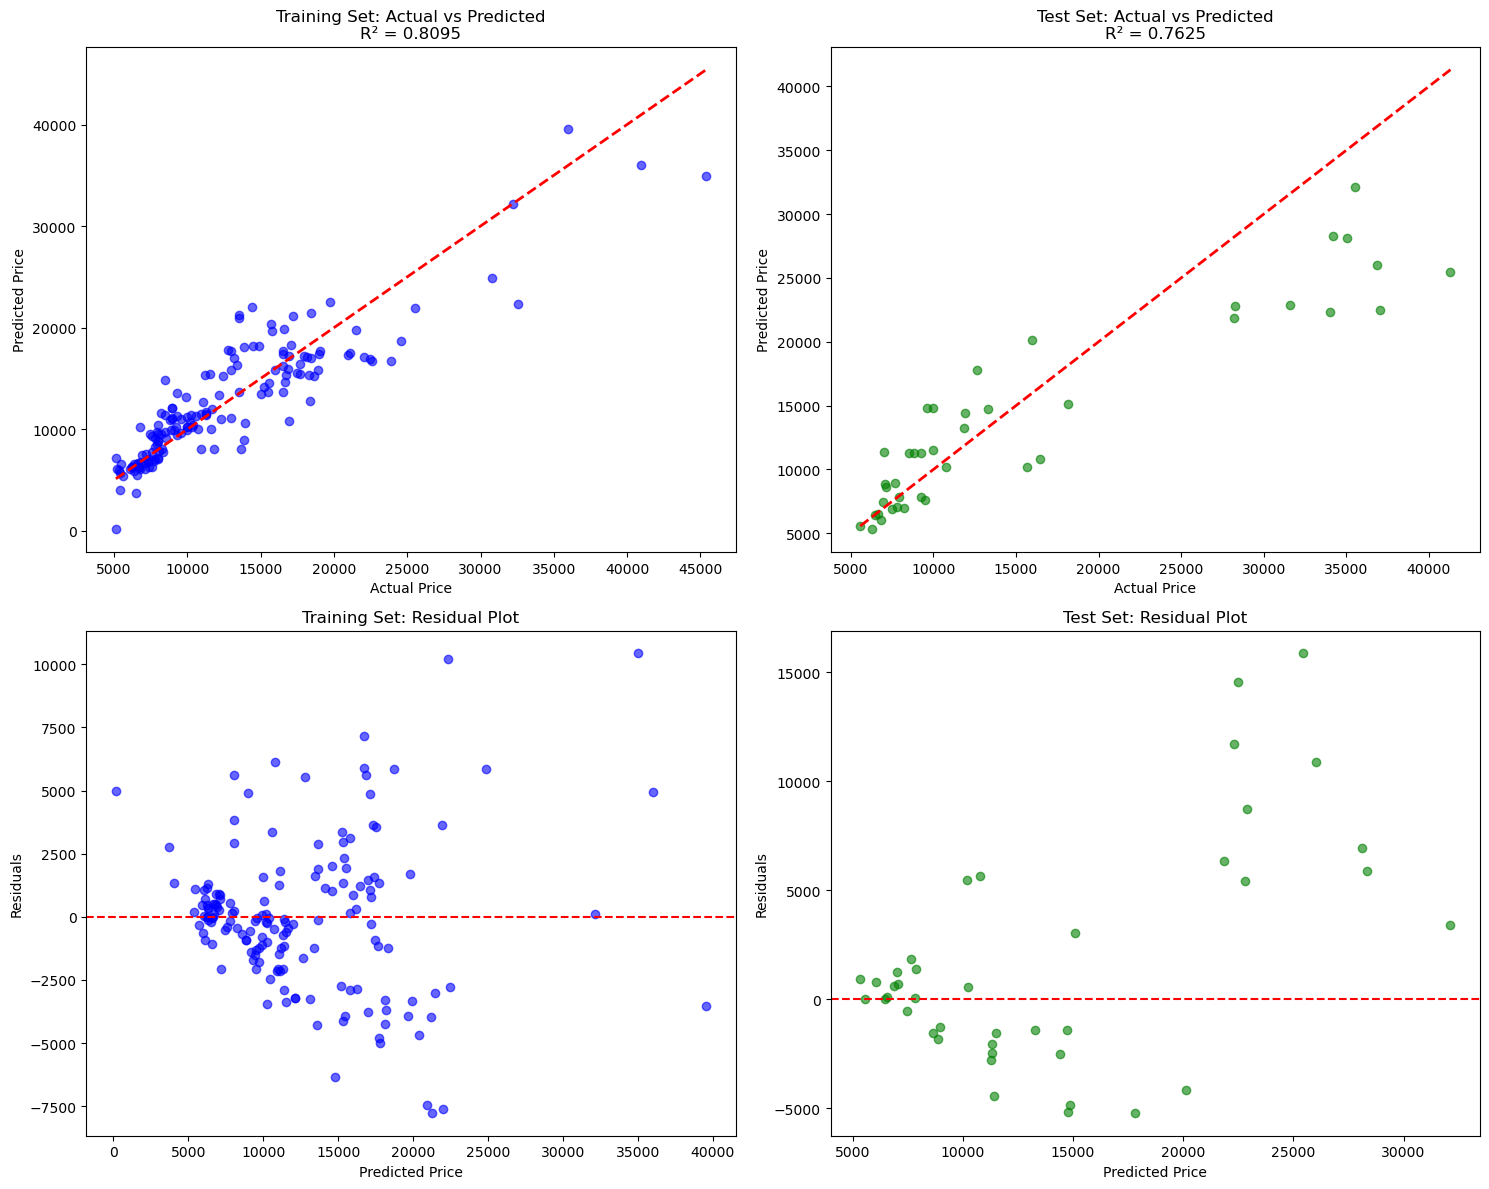


Feature Importance (by coefficient magnitude):
--------------------------------------------------
       Feature  Coefficient  Abs_Coefficient
1  engine-size  3511.730897      3511.730897
3  curb-weight  1935.815942      1935.815942
2   horsepower   832.885154       832.885154
0     city-mpg  -546.316282       546.316282


In [23]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error
import seaborn as sns

# Prepare data with standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate all metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    """Calculate and print regression metrics"""
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"{dataset_name} Metrics:")
    print(f"  R²: {r2:.4f}")
    print(f"  MSE: {mse:,.0f}")
    print(f"  RMSE: ${rmse:,.0f}")
    print(f"  MAE: ${mae:,.0f}")
    print()
    
    return {'R²': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

# Evaluate on training and test sets
train_metrics = calculate_metrics(y_train, y_train_pred, "Training")
test_metrics = calculate_metrics(y_test, y_test_pred, "Test")

# Cross-validation for more robust evaluation
print("Cross-Validation Results (5-fold):")
print("-" * 40)

cv_scores = cross_validate(
    model, X_scaled, y, 
    cv=5, 
    scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
    return_train_score=True
)

print(f"R² - Train: {cv_scores['train_r2'].mean():.4f} ± {cv_scores['train_r2'].std():.4f}")
print(f"R² - Test:  {cv_scores['test_r2'].mean():.4f} ± {cv_scores['test_r2'].std():.4f}")
print(f"RMSE - Train: ${np.sqrt(-cv_scores['train_neg_mean_squared_error']).mean():,.0f} ± ${np.sqrt(-cv_scores['train_neg_mean_squared_error']).std():,.0f}")
print(f"RMSE - Test:  ${np.sqrt(-cv_scores['test_neg_mean_squared_error']).mean():,.0f} ± ${np.sqrt(-cv_scores['test_neg_mean_squared_error']).std():,.0f}")

# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_metrics["R²"]:.4f}')

# 2. Actual vs Predicted (Test)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Predicted Price')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_metrics["R²"]:.4f}')

# 3. Residuals vs Predicted (Training)
residuals_train = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, residuals_train, alpha=0.6, color='blue')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Price')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training Set: Residual Plot')

# 4. Residuals vs Predicted (Test)
residuals_test = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, residuals_test, alpha=0.6, color='green')
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Price')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Test Set: Residual Plot')

plt.tight_layout()
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance (by coefficient magnitude):")
print("-" * 50)
print(feature_importance)

## 7. Overfitting vs Underfitting - The Bias-Variance Tradeoff

**Understanding the balance between model complexity and generalization is crucial for building effective ML models.**

### Key Concepts:

**Underfitting (High Bias)**:
- Model is too simple to capture underlying patterns
- Poor performance on both training and test data
- High training error, high test error
- Signs: Low R² on both training and validation sets

**Overfitting (High Variance)**:
- Model memorizes training data instead of learning patterns
- Great on training data, poor on new data
- Low training error, high test error
- Signs: Large gap between training and validation performance

**Good Fit (Balanced)**:
- Model captures underlying patterns without memorizing noise
- Good performance on both training and test data
- Training and test errors are similar and acceptably low

### The Bias-Variance Tradeoff:
- **Bias**: Error from overly simplistic assumptions
- **Variance**: Error from sensitivity to small fluctuations in training set
- **Goal**: Find the sweet spot that minimizes total error

Demonstrating Bias-Variance Tradeoff with Polynomial Regression


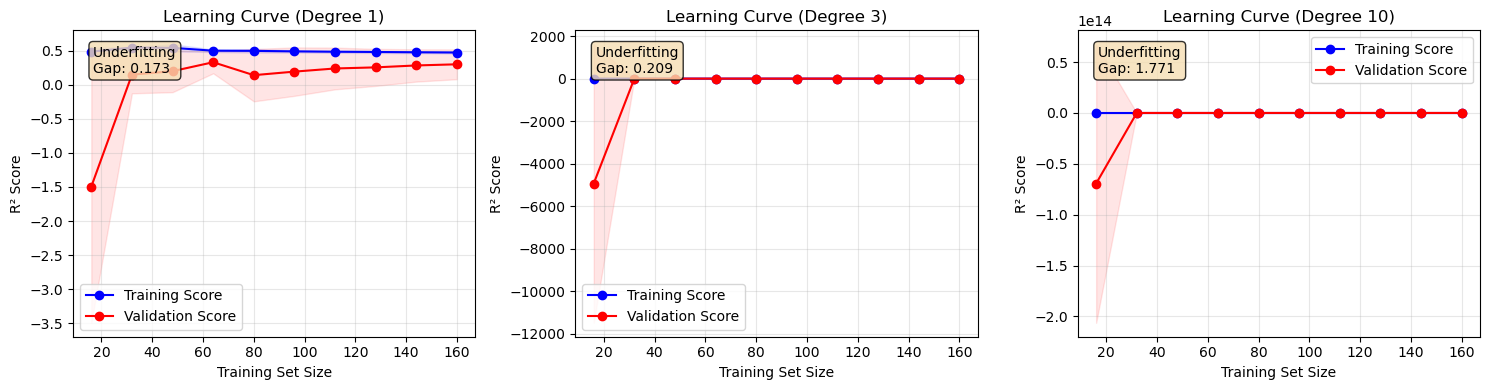

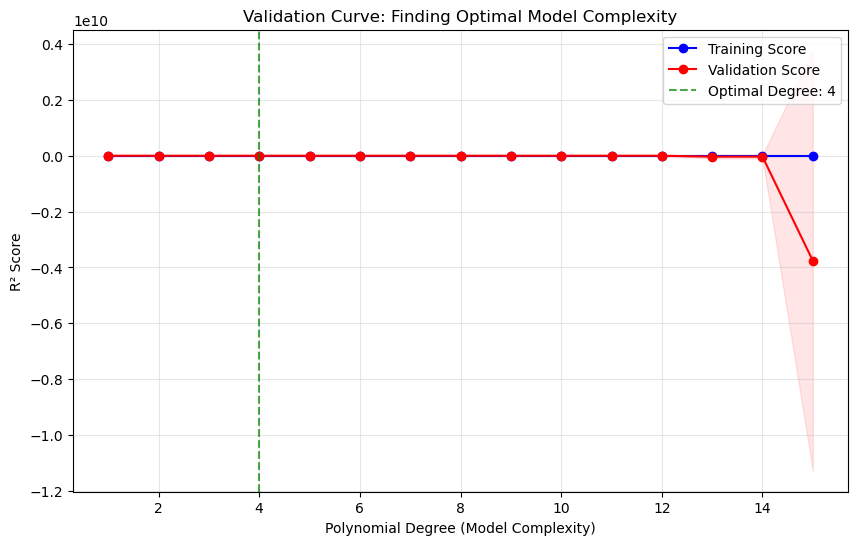


Optimal polynomial degree: 4
Best validation R²: 0.4663

PRACTICAL TIPS FOR AVOIDING OVERFITTING:
1. Use cross-validation to get reliable performance estimates
2. Monitor the gap between training and validation performance
3. Start with simple models and increase complexity gradually
4. Use regularization techniques (Ridge, Lasso) for complex models
5. Collect more data if possible
6. Use feature selection to remove irrelevant features
7. Apply early stopping in iterative algorithms


In [26]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

# Demonstrate overfitting vs underfitting with polynomial features
def plot_learning_curves(degrees, X, y):
    """Plot learning curves for different polynomial degrees"""
    fig, axes = plt.subplots(1, len(degrees), figsize=(5*len(degrees), 4))
    if len(degrees) == 1:
        axes = [axes]
    
    for idx, degree in enumerate(degrees):
        # Create pipeline with polynomial features and scaling
        pipe = Pipeline([
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('scaler', StandardScaler()),
            ('model', LinearRegression())
        ])
        
        # Calculate learning curves
        train_sizes, train_scores, val_scores = learning_curve(
            pipe, X, y, cv=5, n_jobs=-1, 
            train_sizes=np.linspace(0.1, 1.0, 10),
            scoring='r2'
        )
        
        # Calculate mean and std
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)
        
        # Plot learning curves
        axes[idx].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
        axes[idx].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
        
        axes[idx].plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
        axes[idx].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
        
        axes[idx].set_xlabel('Training Set Size')
        axes[idx].set_ylabel('R² Score')
        axes[idx].set_title(f'Learning Curve (Degree {degree})')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
        
        # Determine fit quality
        final_train_score = train_mean[-1]
        final_val_score = val_mean[-1]
        gap = final_train_score - final_val_score
        
        if final_val_score < 0.6:
            fit_quality = "Underfitting"
        elif gap > 0.1:
            fit_quality = "Overfitting"
        else:
            fit_quality = "Good Fit"
            
        axes[idx].text(0.05, 0.95, f'{fit_quality}\nGap: {gap:.3f}', 
                      transform=axes[idx].transAxes, 
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Demonstrate with different polynomial degrees
print("Demonstrating Bias-Variance Tradeoff with Polynomial Regression")
print("=" * 60)

# Use single feature for clearer demonstration
X_simple = df[['city-mpg']].copy()
y_simple = df['price']

# Test different polynomial degrees
degrees_to_test = [1, 3, 10]
plot_learning_curves(degrees_to_test, X_simple, y_simple)

# Show validation curves for model complexity
from sklearn.model_selection import validation_curve

# Validation curve to find optimal polynomial degree
degrees = range(1, 16)
train_scores, val_scores = validation_curve(
    Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]), 
    X_simple, y_simple, 
    param_name='poly__degree', 
    param_range=degrees,
    cv=5, scoring='r2'
)

# Plot validation curve
plt.figure(figsize=(10, 6))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(degrees, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(degrees, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(degrees, val_mean, 'o-', color='red', label='Validation Score')
plt.fill_between(degrees, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.xlabel('Polynomial Degree (Model Complexity)')
plt.ylabel('R² Score')
plt.title('Validation Curve: Finding Optimal Model Complexity')
plt.legend()
plt.grid(True, alpha=0.3)

# Find optimal degree
optimal_idx = np.argmax(val_mean)
optimal_degree = degrees[optimal_idx]
plt.axvline(x=optimal_degree, color='green', linestyle='--', alpha=0.7, 
           label=f'Optimal Degree: {optimal_degree}')
plt.legend()
plt.show()

print(f"\nOptimal polynomial degree: {optimal_degree}")
print(f"Best validation R²: {val_mean[optimal_idx]:.4f}")

# Practical tips
print("\n" + "="*60)
print("PRACTICAL TIPS FOR AVOIDING OVERFITTING:")
print("="*60)
print("1. Use cross-validation to get reliable performance estimates")
print("2. Monitor the gap between training and validation performance")
print("3. Start with simple models and increase complexity gradually")
print("4. Use regularization techniques (Ridge, Lasso) for complex models")
print("5. Collect more data if possible")
print("6. Use feature selection to remove irrelevant features")
print("7. Apply early stopping in iterative algorithms")

## 8. Regularization Techniques - Controlling Model Complexity

**Regularization** helps prevent overfitting by adding a penalty term to the loss function, encouraging simpler models.

### Types of Regularization:

**Ridge Regression (L2 Regularization)**:
- Adds penalty proportional to sum of squared coefficients
- Shrinks coefficients towards zero but doesn't eliminate them
- Good when all features are somewhat relevant
- Formula: Loss = MSE + α × Σ(β²)

**Lasso Regression (L1 Regularization)**:
- Adds penalty proportional to sum of absolute coefficients
- Can drive coefficients to exactly zero (feature selection)
- Good for sparse models with few important features
- Formula: Loss = MSE + α × Σ|β|

**Elastic Net**:
- Combines both L1 and L2 penalties
- Balances feature selection and coefficient shrinkage
- Formula: Loss = MSE + α₁ × Σ|β| + α₂ × Σ(β²)

### Hyperparameter α (alpha):
- **α = 0**: No regularization (ordinary least squares)
- **α → ∞**: Maximum regularization (coefficients → 0)
- **Finding optimal α**: Use cross-validation

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

# Prepare high-dimensional data to demonstrate regularization
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(f"Original features: {X.shape[1]}")
print(f"After polynomial features (degree 3): {X_poly.shape[1]}")

# Split the polynomial data
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Scale the polynomial features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Compare different regularization techniques
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Train and evaluate each model
results = {}
print("Model Comparison with Polynomial Features (degree=3):")
print("=" * 60)

for name, model in models.items():
    # Fit model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Count non-zero coefficients
    if hasattr(model, 'coef_'):
        non_zero_coefs = np.sum(np.abs(model.coef_) > 1e-5)
    else:
        non_zero_coefs = X_poly.shape[1]
    
    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'non_zero_coefs': non_zero_coefs,
        'overfitting': train_r2 - test_r2
    }
    
    print(f"{name}:")
    print(f"  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"  Overfitting Gap: {train_r2 - test_r2:.4f}")
    print(f"  Test RMSE: ${test_rmse:,.0f}")
    print(f"  Non-zero coefficients: {non_zero_coefs}/{X_poly.shape[1]}")
    print()

# Visualize coefficient comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    if hasattr(model, 'coef_'):
        coef_df = pd.DataFrame({
            'Feature_Index': range(len(model.coef_)),
            'Coefficient': model.coef_
        })
        
        # Plot coefficient magnitudes
        axes[idx].bar(coef_df['Feature_Index'], coef_df['Coefficient'])
        axes[idx].set_title(f'{name} - Coefficients')
        axes[idx].set_xlabel('Feature Index')
        axes[idx].set_ylabel('Coefficient Value')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Hyperparameter tuning for Ridge regression
print("Hyperparameter Tuning for Ridge Regression:")
print("-" * 50)

# Define alpha values to test
alphas = np.logspace(-4, 2, 50)  # From 0.0001 to 100

# Grid search for optimal alpha
ridge_grid = GridSearchCV(
    Ridge(),
    param_grid={'alpha': alphas},
    cv=5,
    scoring='r2',
    n_jobs=-1
)

ridge_grid.fit(X_train_scaled, y_train)

print(f"Best alpha: {ridge_grid.best_params_['alpha']:.4f}")
print(f"Best CV score: {ridge_grid.best_score_:.4f}")

# Plot validation curve for Ridge alpha
train_scores, val_scores = validation_curve(
    Ridge(), X_train_scaled, y_train,
    param_name='alpha', param_range=alphas,
    cv=5, scoring='r2'
)

plt.figure(figsize=(10, 6))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.semilogx(alphas, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(alphas, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.semilogx(alphas, val_mean, 'o-', color='red', label='Validation Score')
plt.fill_between(alphas, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.axvline(x=ridge_grid.best_params_['alpha'], color='green', linestyle='--', 
           label=f'Optimal α = {ridge_grid.best_params_["alpha"]:.4f}')

plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: Validation Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Test the optimized model
best_ridge = ridge_grid.best_estimator_
y_test_pred_ridge = best_ridge.predict(X_test_scaled)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print(f"\nOptimized Ridge Regression Performance:")
print(f"Test R²: {test_r2_ridge:.4f}")
print(f"Test RMSE: ${test_rmse_ridge:,.0f}")

## 9. Building Complete ML Pipelines

**Pipelines** allow you to chain multiple processing steps together, ensuring consistent data transformations and making your code more maintainable and reproducible.

### Benefits of Pipelines:
- **Consistency**: Same transformations applied to training and test data
- **Reproducibility**: Easy to recreate exact preprocessing steps
- **Cross-validation friendly**: Prevents data leakage during CV
- **Deployment ready**: Single object contains entire workflow
- **Hyperparameter tuning**: Tune preprocessing and model parameters together

### Pipeline Components:
1. **Data preprocessing**: Scaling, encoding, feature engineering
2. **Feature selection**: Remove irrelevant features
3. **Model training**: The actual machine learning algorithm
4. **Hyperparameter optimization**: Find best parameters via cross-validation

### Best Practices:
- Always fit transformers on training data only
- Use pipelines for cross-validation to prevent data leakage
- Include all preprocessing steps in the pipeline
- Save the entire pipeline for deployment

Building Complete ML Pipeline
Hyperparameter Grid:
  preprocessor__numeric__poly__degree: [1, 2, 3]
  preprocessor__numeric__selector__k: [5, 10, 15, 20]
  regressor__alpha: [1.00000000e-04 4.64158883e-04 2.15443469e-03 1.00000000e-02
 4.64158883e-02 2.15443469e-01 1.00000000e+00 4.64158883e+00
 2.15443469e+01 1.00000000e+02]

Performing hyperparameter optimization...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/controlab/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(
/home/controlab/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(
/home/controlab/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(
/home/controlab/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(
/home/controlab/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=4. Al


Best Parameters:
  regressor__alpha: 0.01
  preprocessor__numeric__selector__k: 20
  preprocessor__numeric__poly__degree: 2

Best CV R² Score: 0.7948

Test Set Performance:
R² Score: 0.7784
RMSE: $5,207

Pipeline Analysis:
------------------------------
Polynomial degree: 2
Features selected: 20
Regularization strength (α): 0.0100


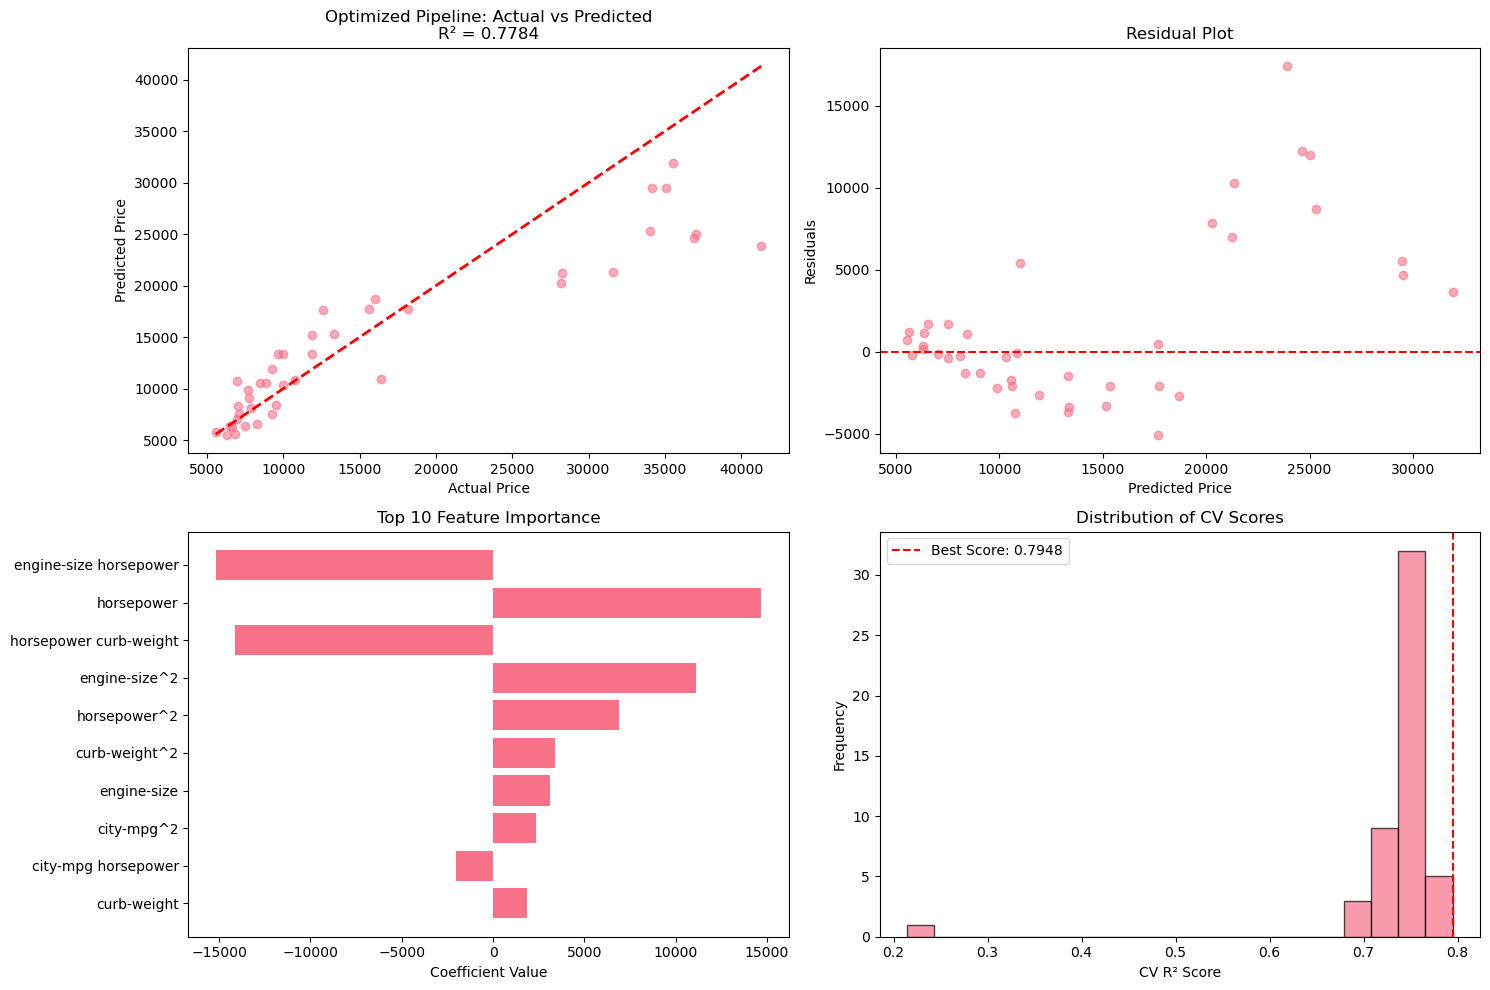


Pipeline saved as: optimized_car_price_pipeline.joblib

Pipeline Usage Example:
------------------------------
New car predictions:
Car 1: $25,505
Car 2: $48,518
Car 3: $19,149

Pipeline Structure:
--------------------
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('selector',
                                                                   SelectKBest(k=20,
                                                                               score_func=<function f_regression at 0x7aff1693bb00>))]),
                                       

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
import joblib

# Define our features
numeric_features = ['city-mpg', 'engine-size', 'horsepower', 'curb-weight']
X = df[numeric_features].copy()
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Building Complete ML Pipeline")
print("=" * 40)

# Create comprehensive pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric', Pipeline([
            ('poly', PolynomialFeatures(include_bias=False)),
            ('scaler', StandardScaler()),
            ('selector', SelectKBest(score_func=f_regression))
        ]), numeric_features)
    ])),
    ('regressor', Ridge())
])

# Define hyperparameter grid for comprehensive tuning
param_grid = {
    'preprocessor__numeric__poly__degree': [1, 2, 3],
    'preprocessor__numeric__selector__k': [5, 10, 15, 20],
    'regressor__alpha': np.logspace(-4, 2, 10)
}

print("Hyperparameter Grid:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

# Perform randomized search (faster than grid search)
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=50,  # Try 50 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("\nPerforming hyperparameter optimization...")
random_search.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest Parameters:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest CV R² Score: {random_search.best_score_:.4f}")

# Evaluate on test set
best_pipeline = random_search.best_estimator_
y_test_pred = best_pipeline.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTest Set Performance:")
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: ${test_rmse:,.0f}")

# Analyze the best pipeline
print(f"\nPipeline Analysis:")
print("-" * 30)

# Get polynomial degree used
poly_degree = random_search.best_params_['preprocessor__numeric__poly__degree']
print(f"Polynomial degree: {poly_degree}")

# Get number of features selected
k_features = random_search.best_params_['preprocessor__numeric__selector__k']
print(f"Features selected: {k_features}")

# Get regularization strength
alpha = random_search.best_params_['regressor__alpha']
print(f"Regularization strength (α): {alpha:.4f}")

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.6)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')
axes[0, 0].set_title(f'Optimized Pipeline: Actual vs Predicted\nR² = {test_r2:.4f}')

# 2. Residuals
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Price')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# 3. Feature importance (coefficients)
# Get transformed feature names
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_temp = poly_features.fit_transform(X_train)
feature_names = poly_features.get_feature_names_out(numeric_features)

# Get selected features
selector = best_pipeline.named_steps['preprocessor'].named_transformers_['numeric'].named_steps['selector']
selected_features = selector.get_support()
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_features[i]]

# Get coefficients
coef = best_pipeline.named_steps['regressor'].coef_
feature_importance = pd.DataFrame({
    'Feature': selected_feature_names,
    'Coefficient': coef,
    'Abs_Coefficient': np.abs(coef)
}).sort_values('Abs_Coefficient', ascending=True)

# Plot top 10 features
top_features = feature_importance.tail(10)
axes[1, 0].barh(range(len(top_features)), top_features['Coefficient'])
axes[1, 0].set_yticks(range(len(top_features)))
axes[1, 0].set_yticklabels(top_features['Feature'])
axes[1, 0].set_xlabel('Coefficient Value')
axes[1, 0].set_title('Top 10 Feature Importance')

# 4. Cross-validation scores distribution
cv_scores = random_search.cv_results_['mean_test_score']
axes[1, 1].hist(cv_scores, bins=20, alpha=0.7, edgecolor='black')
axes[1, 1].axvline(random_search.best_score_, color='red', linestyle='--', 
                  label=f'Best Score: {random_search.best_score_:.4f}')
axes[1, 1].set_xlabel('CV R² Score')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of CV Scores')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Save the pipeline
pipeline_filename = 'optimized_car_price_pipeline.joblib'
joblib.dump(best_pipeline, pipeline_filename)
print(f"\nPipeline saved as: {pipeline_filename}")

# Demonstrate pipeline usage for new predictions
print(f"\nPipeline Usage Example:")
print("-" * 30)

# Create sample new data
new_car_data = pd.DataFrame({
    'city-mpg': [30, 25, 35],
    'engine-size': [2.0, 3.5, 1.8],
    'horsepower': [150, 250, 120],
    'curb-weight': [2500, 3500, 2200]
})

# Make predictions
predictions = best_pipeline.predict(new_car_data)

print("New car predictions:")
for i, pred in enumerate(predictions):
    print(f"Car {i+1}: ${pred:,.0f}")
    
# Show the complete pipeline structure
print(f"\nPipeline Structure:")
print("-" * 20)
print(best_pipeline)

## 10. Summary and Best Practices

### Key Takeaways from Model Development

**🎯 Model Development Process:**
1. **Start Simple**: Begin with basic linear regression to establish baseline
2. **Add Complexity Gradually**: Introduce polynomial features, multiple variables step by step
3. **Validate Continuously**: Use cross-validation to monitor generalization performance
4. **Regularize When Needed**: Apply Ridge/Lasso to prevent overfitting with complex models
5. **Optimize Systematically**: Use grid/random search for hyperparameter tuning
6. **Build Pipelines**: Create reproducible, deployment-ready workflows

**📊 Evaluation Best Practices:**
- **Multiple Metrics**: Don't rely on R² alone - consider RMSE, MAE for interpretability
- **Cross-Validation**: Use 5-fold CV for reliable performance estimates
- **Learning Curves**: Monitor training vs validation performance to detect overfitting
- **Residual Analysis**: Check for patterns in residuals that indicate model issues
- **Feature Importance**: Understand which features drive predictions

**⚖️ Bias-Variance Tradeoff:**
- **Underfitting**: Model too simple → Add complexity (polynomial features, more variables)
- **Overfitting**: Model too complex → Add regularization, reduce features, get more data
- **Sweet Spot**: Good performance on both training and test sets with minimal gap

**🔧 Regularization Guidelines:**
- **Ridge**: Use when all features are somewhat relevant
- **Lasso**: Use for feature selection and sparse models
- **ElasticNet**: Use when you want both shrinkage and selection
- **α tuning**: Always use cross-validation to find optimal regularization strength

**🚀 Pipeline Advantages:**
- **Prevents Data Leakage**: Transformations applied consistently
- **Reproducible**: Entire workflow captured in single object
- **Deployment Ready**: Easy to save and load for production
- **Hyperparameter Tuning**: Optimize preprocessing and model together

### Real-World Application Tips

**Data Quality:**
- Clean data is more important than complex algorithms
- Handle missing values appropriately
- Remove or investigate outliers
- Ensure features are relevant and informative

**Feature Engineering:**
- Domain knowledge is crucial for creating meaningful features
- Polynomial features can capture non-linear relationships
- Feature scaling is essential for many algorithms
- Consider interaction terms between features

**Model Selection:**
- Start with interpretable models (linear regression)
- Add complexity only if it improves validation performance
- Consider computational requirements for production
- Balance accuracy with interpretability needs

**Validation Strategy:**
- Always keep a separate test set untouched until final evaluation
- Use time-based splits for time series data
- Ensure train/validation/test splits are representative
- Monitor performance over time in production

### Common Pitfalls to Avoid

❌ **Data Leakage**: Using future information or test set for preprocessing
❌ **Overfitting to Validation Set**: Excessive hyperparameter tuning on same validation set
❌ **Ignoring Business Context**: Building accurate but unusable models
❌ **Feature Scaling Mistakes**: Not scaling consistently across train/test sets
❌ **Poor Evaluation**: Relying only on training performance or single metrics

### Next Steps in Your ML Journey

1. **Advanced Algorithms**: Explore tree-based methods (Random Forest, XGBoost)
2. **Feature Selection**: Learn automated feature selection techniques
3. **Ensemble Methods**: Combine multiple models for better performance
4. **Time Series**: Apply these concepts to temporal data
5. **Deep Learning**: Understand neural networks for complex patterns
6. **MLOps**: Learn deployment, monitoring, and maintenance of ML systems

**Remember**: *The goal is not just to build models, but to solve real problems with reliable, maintainable, and interpretable solutions.*